# <span style="color:red">Monte Carlo Simulation</span>

#### v2.0.0

For fixed scope type 1 / For target date type 2: 2
input days left: 33
input number of intended MCS runs: 10000
Is your TP >= 1? Select [y/n], press ENTER: n
input work item Throughput (TP): 0.5


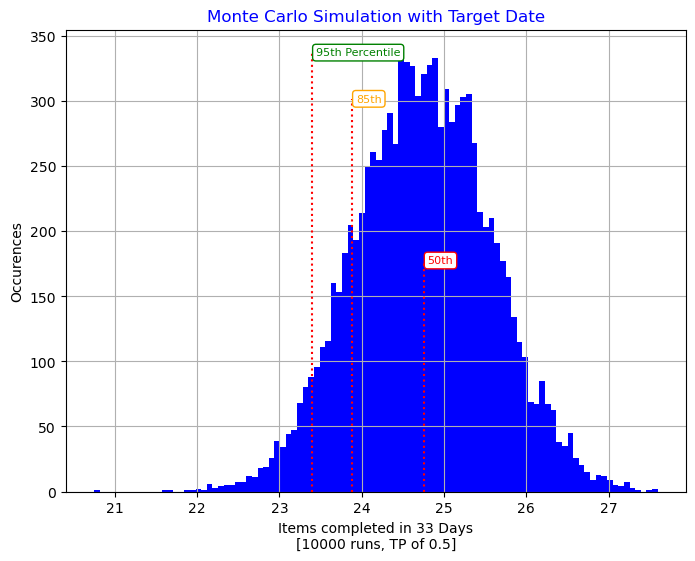

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import random
from typing import ItemsView
import re
from datetime import date

%matplotlib inline
today = date.today()

# FIXED SCOPE

item_output_per_scope = np.array([], dtype="f")

def mcs_fixed_scope_int():
    item_output = np.array([], dtype="f")
    item_count = pbi_count
    loop_count = 0
    while item_count > 0:
        integer = float(np.random.randint(0, tp_float + 1))
        item_count -= integer
        loop_count += 1
    item_output = np.append(item_output, loop_count)
    return item_output

def mcs_fixed_scope_float():
    item_output = np.array([], dtype="f")
    item_count = float(pbi_count)
    loop_count = 0
    while item_count > 0:
        float_num = np.random.uniform(tp_float)
        item_count -= float_num
        loop_count += 1
    item_output = np.append(item_output, loop_count)
    return item_output

# TARGET DATE

item_output_per_time = np.array([], dtype="f")

def mcs_target_date_int():
    item_output = np.array([], dtype="f")
    days_count = 0
    items = 0.0
    loop_count = 0
    while days_count < days_left_count:
        random_tp_float = float(np.random.randint(0, tp_float + 1))
        items = items + random_tp_float
        days_count += 1
        #loop_count += 1
    item_output = np.append(item_output, items)
    return item_output

def mcs_target_date_float():
    item_output = np.array([], dtype="f")
    days_count = 0
    items = 0.0
    loop_count = 0
    while days_count < days_left_count:
        random_tp_float = np.random.uniform(tp_float)
        items = items + random_tp_float
        days_count += 1
        #loop_count += 1
    item_output = np.append(item_output, items)
    return item_output

x = "place_holder"

def plot_trigger1():
    global x
    x = "trigger1"
    
def plot_trigger2():
    global x
    x = "trigger2"


while True:
    selection_of_mcs_type = input("For fixed scope type 1 / For target date type 2: ")
    if selection_of_mcs_type == "1":
        pbi_count = float(input("input item count: "))
        pbi_count_plot = int(pbi_count) 
        intended_runs = int(input("input number of intended MCS runs: "))
        request_var = input("Is your TP >= 1? Select [y/n], press ENTER: ")
        
        if request_var == "y":
            tp_float = float(input("input work item Throughput (TP): ")) # select the teams work item throughput
            for i in range(intended_runs):
                i_o = mcs_fixed_scope_int()
                item_output_per_scope = np.append(item_output_per_scope, i_o)
            tp = int(tp_float)
            plot_trigger1()
            break
        elif request_var == "n":
            tp_float = float(input("input work item Throughput (TP): "))
            for i in range(intended_runs):
                i_o = mcs_fixed_scope_float()
                item_output_per_scope = np.append(item_output_per_scope, i_o)
            tp = tp_float
            plot_trigger1()
            break
        else:
            print("Your answer was neither 'yes' nor 'no'! Please choose!")     
    elif selection_of_mcs_type == "2":
        days_left_count = int(input("input days left: "))                      
        intended_runs = int(input("input number of intended MCS runs: "))
        request_var = input("Is your TP >= 1? Select [y/n], press ENTER: ")
        
        if request_var == "y":
            tp_float = float(input("input work item Throughput (TP): ")) # select the teams work item throughput
            for i in range(intended_runs):
                i_o = mcs_target_date_int()
                item_output_per_time = np.append(item_output_per_time, i_o)
            tp = int(tp_float)
            plot_trigger2()
            break
        elif request_var == "n":
            tp_float = float(input("input work item Throughput (TP): "))
            for i in range(intended_runs):
                i_o = mcs_target_date_float()
                item_output_per_time = np.append(item_output_per_time, i_o)
            tp = tp_float
            plot_trigger2()
            break
        else:
            print("Your answer was neither 'yes' nor 'no'! Please choose!")
    else:
            print("You have to choose between scope and target date!")
            

#print(item_output_per_scope)
#print(item_output_per_time)

if x == "trigger1":
    mcs_series = pd.Series(item_output_per_scope, name="Monte Carlo Simulation with Fixed Scope")
    fig, ax = plt.subplots(figsize=(8,6))
    mcs_series.plot(kind="hist", color="blue", alpha=1, bins=100)
    #mcs_series.plot(kind="kde")

    y_lim = ax.get_ylim()
    y = y_lim[1]
    y_lim, y

    quant_50, quant_85, quant_95 = mcs_series.quantile(0.5), mcs_series.quantile(0.85), mcs_series.quantile(0.95)
    quant_50, quant_85, quant_95
    
    if request_var == "y": 
        x_50 = quant_50 + (quant_50 * 0.015)
        x_85 = quant_85 + (quant_85 * 0.015)
        x_95 = quant_95 + (quant_95 * 0.015)
        y_50 = y - (y * 0.5)
        y_85 = y - (y * 0.15)
        y_95 = y - (y * 0.05)
    elif request_var == "n":
        x_50 = quant_50 + (quant_50 * 0.002)
        x_85 = quant_85 + (quant_85 * 0.002)
        x_95 = quant_95 + (quant_95 * 0.002)
        y_50 = y - (y * 0.5)
        y_85 = y - (y * 0.15)
        y_95 = y - (y * 0.05)
        
    quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
    
    for i in quants:
        plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

    ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="red",
            bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
    ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="orange",
            bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
    ax.text(x_95, y_95, "95th",  horizontalalignment="left", verticalalignment="center",size=9, alpha=1, color="green",
            bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


    ax.set(title=mcs_series.name, xlabel=f"Days passed to complete {pbi_count_plot} PBIs\n[{intended_runs} runs, TP of {tp}, {today}]", ylabel="Occurences")
    ax.title.set_color("blue")
    ax.xaxis.label.set_color("black")
    ax.yaxis.label.set_color("black")
    plt.grid(True)
    plt.show()
    
elif x == "trigger2":
    mcs_target_date = pd.Series(item_output_per_time, name="Monte Carlo Simulation with Target Date")

    fig, ax = plt.subplots(figsize=(8,6))
    mcs_target_date.plot(kind="hist", color="blue", alpha=1, bins=100)
    #mcs_series.plot(kind="kde")

    y_lim = ax.get_ylim()
    y = y_lim[1]
    y_lim, y

    quant_50, quant_85, quant_95 = mcs_target_date.quantile(0.5), mcs_target_date.quantile(0.15), mcs_target_date.quantile(0.05)
    quant_50, quant_85, quant_95

    if request_var == "y": 
        x_50 = quant_50 + (quant_50 * 0.015)
        x_85 = quant_85 + (quant_85 * 0.015)
        x_95 = quant_95 + (quant_95 * 0.015)
        y_50 = y - (y * 0.5)
        y_85 = y - (y * 0.15)
        y_95 = y - (y * 0.05)
    elif request_var == "n":
        x_50 = quant_50 + (quant_50 * 0.002)
        x_85 = quant_85 + (quant_85 * 0.002)
        x_95 = quant_95 + (quant_95 * 0.002)
        y_50 = y - (y * 0.5)
        y_85 = y - (y * 0.15)
        y_95 = y - (y * 0.05)

    quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
    
    for i in quants:
        plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

    ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="red",
            bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
    ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="orange",
            bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
    ax.text(x_95, y_95, "95th Percentile",  horizontalalignment="left", verticalalignment="center",size=9, alpha=1, color="green",
            bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


    ax.set(title=mcs_target_date.name, xlabel=f"Items completed in {days_left_count} Days\n[{intended_runs} runs, TP of {tp}]", ylabel="Occurences")
    ax.title.set_color("blue")
    ax.xaxis.label.set_color("black")
    ax.yaxis.label.set_color("black")
    plt.grid(True)
    plt.show()